**Car Resale Price Analysis & Visualization System
Problem Statement**


You are a data analyst working for a car dealership. You have received a CSV file containing sales data. Your goal is to understand the sales pattern, customer behavior, and make visual insights using Python basics, Object-Oriented Programming (OOP), NumPy, Pandas, Matplotlib, and Seaborn.

Your job includes:

Data cleaning and preprocessing
Basic analysis
OOP implementation
Visualization
Extracting insights

# Car Resale Price Analysis and Visualization

This notebook presents an analysis of car resale prices to understand sales patterns, customer behavior, and extract valuable insights for the car dealership.

## 1. Loading Necessary Libraries

This cell imports the required Python libraries for data manipulation, analysis, and visualization, including pandas for data handling, numpy for numerical operations, and matplotlib and seaborn for plotting.

In [34]:
# First import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the Dataset

Here, we load the car sales data from the provided CSV file into a pandas DataFrame.

In [55]:
# Load the file using python pandas
df=pd.read_csv('/content/sample_data/daTA.csv')

## 3. Displaying the First Few Rows

This helps in getting a quick overview of the data structure and content.

In [56]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## 4. Checking for Missing Values

This step checks for any missing values in the dataset, which is crucial for data cleaning.

In [57]:
df.isnull().sum().sum()

np.int64(0)

## 5. Checking for Duplicate Rows

We identify and count duplicate rows in the dataset to ensure data integrity.

In [58]:
df.duplicated().sum()

np.int64(2)

## 6. Dropping Duplicate Rows

Duplicate rows are removed from the DataFrame to avoid skewed analysis.

In [59]:
df.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## 7. Descriptive Statistics

This provides a summary of the central tendency, dispersion, and shape of the numerical features.

In [60]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## 8. Data Information

This displays the data types and non-null counts for each column, along with memory usage.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## 9. Column Names

Listing the column names helps in easily referencing them during the analysis.

In [62]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

## 10. Dataset Shape

This shows the number of rows and columns in the DataFrame.

In [63]:
df.shape

(301, 9)

## 11. Dataset Dimensions

This indicates the number of dimensions of the dataset (2 for a DataFrame).

In [64]:
df.ndim

2

## 12. Correlation Matrix

Calculating the correlation matrix helps in understanding the relationships between numerical variables.

In [65]:
df.corr(numeric_only=True)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


## 13. Visualizing Numerical Features for Outliers (Before Handling)

Box plots are generated for all numerical columns to visualize the presence of outliers before handling them.

Year
Selling_Price
Present_Price
Kms_Driven
Owner


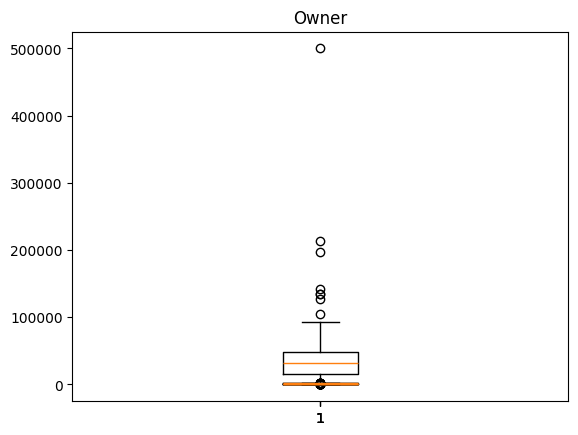

In [66]:
for i in df.columns:
  if df[i].dtype =='int64' or df[i].dtype =='float64':
    print(i)
    plt.boxplot(df[i])
    plt.title(i)
    plt.show

## 14. Handling Outliers using IQR

This code removes outliers from the numerical columns using the Interquartile Range (IQR) method.

In [67]:
for i in df.columns:
  if df[i].dtype =='int64' or df[i].dtype =='float64':
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    df=df[(df[i]>=lower_bound) & (df[i]<=upper_bound)]

## 15. Visualizing Numerical Features After Outlier Handling

Box plots are generated again after removing outliers to see the effect of the outlier handling process.

Year
Selling_Price
Present_Price
Kms_Driven
Owner


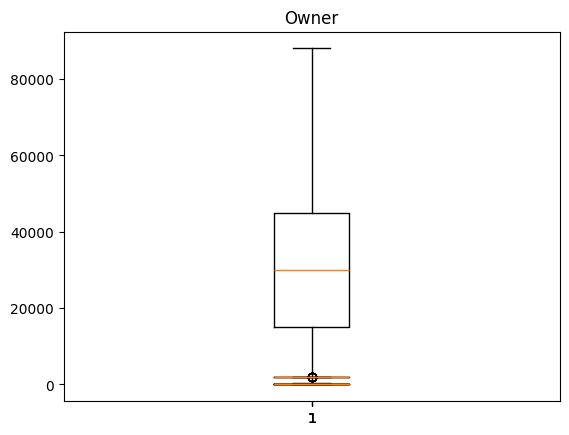

In [68]:
for i in df.columns:
  if df[i].dtype =='int64' or df[i].dtype =='float64':
    print(i)
    plt.boxplot(df[i])
    plt.title(i)
    plt.show

## 16. Car Data Analyzer Class

This section defines a Python class `CarDataAnalyzer` to encapsulate the data and analysis methods using Object-Oriented Programming principles.

In [69]:
class CarDataAnalyzer:
    """
    A class to encapsulate car resale data and analysis methods.
    """
    def __init__(self, dataframe):
        """
        Initializes the CarDataAnalyzer with a pandas DataFrame.

        Args:
            dataframe (pd.DataFrame): The DataFrame containing car resale data.
        """
        self.df = dataframe
        print("CarDataAnalyzer initialized with a DataFrame.")

    def perform_basic_analysis(self):
        """
        Performs basic statistical analysis on the data.
        """
        print("\n--- Basic Data Analysis ---")
        print("Descriptive Statistics:")
        display(self.df.describe())
        print("\nInfo:")
        display(self.df.info())
        print("\nShape:")
        display(self.df.shape)
        print("\nColumn Names:")
        display(self.df.columns)

    def extract_insights(self):
        """
        Extracts and prints key insights from the data.
        """
        print("\n--- Key Insights ---")
        # Example insight: Most common fuel type
        most_common_fuel = self.df['Fuel_Type'].mode()[0]
        print(f"Most common fuel type: {most_common_fuel}")

        # Example insight: Average selling price
        average_selling_price = self.df['Selling_Price'].mean()
        print(f"Average selling price: {average_selling_price:.2f}")

        # Example insight: Correlation between Selling_Price and Present_Price
        correlation = self.df['Selling_Price'].corr(self.df['Present_Price'])
        print(f"Correlation between Selling Price and Present Price: {correlation:.2f}")

        # Add more insights based on the problem statement and visualizations

## 17. Performing Basic Analysis and Extracting Insights

An instance of the `CarDataAnalyzer` class is created, and its methods are called to perform basic analysis and extract key insights from the data.

In [70]:
# Create an instance of the CarDataAnalyzer class
car_analyzer = CarDataAnalyzer(df)

# Perform basic analysis
car_analyzer.perform_basic_analysis()

# Extract and display insights
car_analyzer.extract_insights()

CarDataAnalyzer initialized with a DataFrame.

--- Basic Data Analysis ---
Descriptive Statistics:


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,261.000000,261.000000,261.000000,261.000000,261.0
mean,2013.988506,3.861494,6.103065,31336.379310,0.0
std,2.359079,3.090539,4.822646,20140.560576,0.0
min,2006.000000,0.120000,0.320000,500.000000,0.0
25%,2013.000000,0.900000,1.200000,15000.000000,0.0
50%,2015.000000,3.500000,5.900000,30000.000000,0.0
75%,2016.000000,5.850000,9.400000,45000.000000,0.0
max,2018.000000,12.900000,20.450000,88000.000000,0.0



Info:
<class 'pandas.core.frame.DataFrame'>
Index: 261 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       261 non-null    object 
 1   Year           261 non-null    int64  
 2   Selling_Price  261 non-null    float64
 3   Present_Price  261 non-null    float64
 4   Kms_Driven     261 non-null    int64  
 5   Fuel_Type      261 non-null    object 
 6   Seller_Type    261 non-null    object 
 7   Transmission   261 non-null    object 
 8   Owner          261 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 20.4+ KB


None


Shape:


(261, 9)


Column Names:


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


--- Key Insights ---
Most common fuel type: Petrol
Average selling price: 3.86
Correlation between Selling Price and Present Price: 0.87


## 18. Data Visualization

This section generates various plots to visualize the data and understand the relationships between different features.

### Distribution of Car Resale Prices (Histogram)

This histogram shows the frequency distribution of car selling prices.

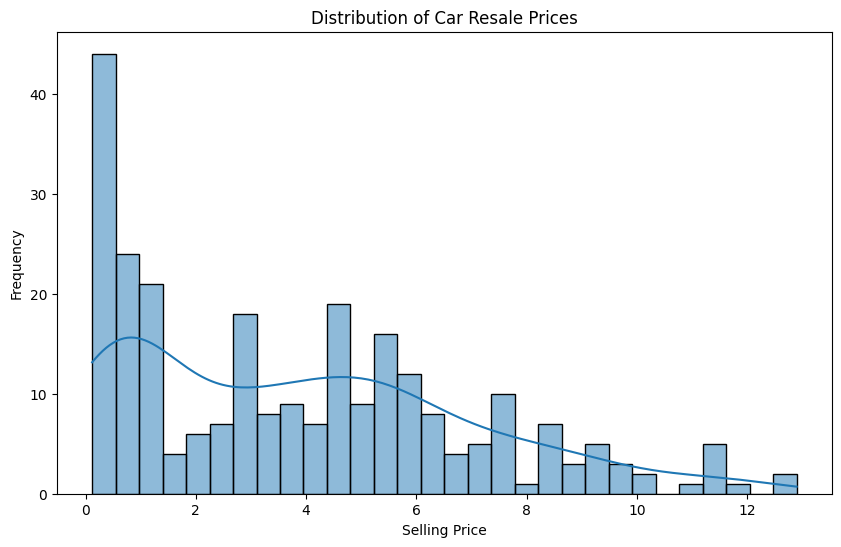

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of 'Selling_Price'
plt.figure(figsize=(10, 6))
sns.histplot(df['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Car Resale Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

### Selling Price vs. Present Price (Scatter Plot)

This scatter plot illustrates the relationship between the car's present price and its selling price.

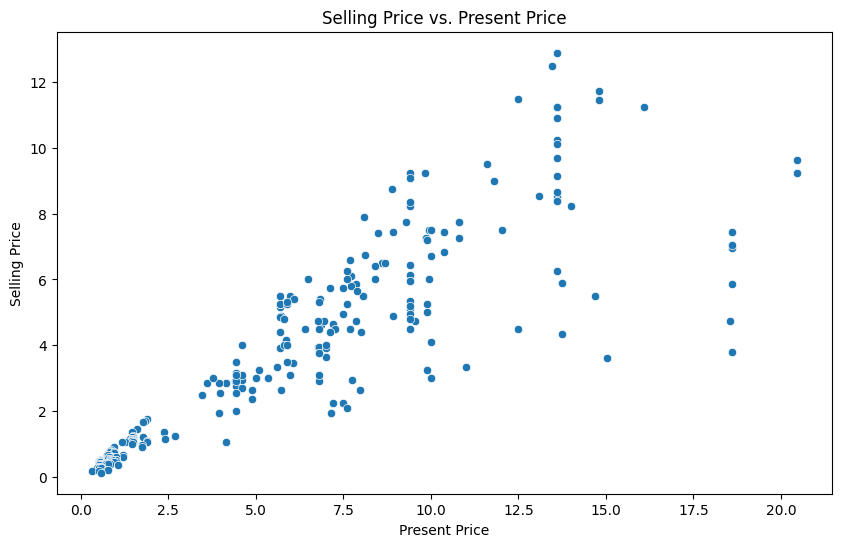

In [72]:
# 2. Scatter plot of 'Present_Price' vs. 'Selling_Price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.title('Selling Price vs. Present Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

### Distribution of Fuel Types (Count Plot)

This count plot shows the distribution of different fuel types in the dataset.

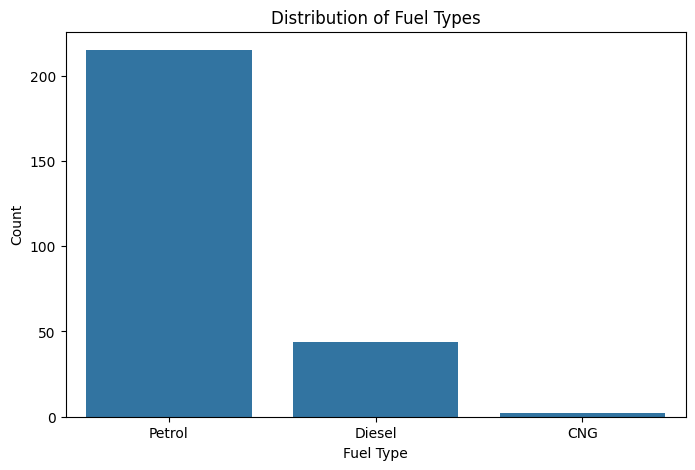

In [73]:
# 3. Count plot of 'Fuel_Type'
plt.figure(figsize=(8, 5))
sns.countplot(x='Fuel_Type', data=df)
plt.title('Distribution of Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

### Selling Price Distribution by Seller Type (Box Plot)

This box plot compares the distribution of selling prices based on the seller type (Dealer or Individual).

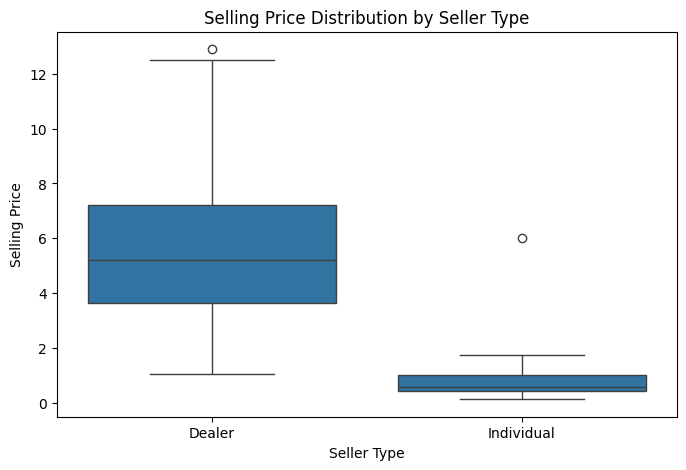

In [74]:
# 4. Box plot of 'Selling_Price' grouped by 'Seller_Type'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df)
plt.title('Selling Price Distribution by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()

## 19. Summary of Findings

This section summarizes the key insights and observations from the data analysis and visualizations, providing a concise overview for management.

Based on the analysis and visualizations, here are some key findings:

* **Distribution of Selling Prices:** The histogram shows that the majority of cars are sold at lower prices, with a long tail indicating a few cars with high selling prices.
* **Relationship between Present Price and Selling Price:** The scatter plot reveals a strong positive correlation between the present price and the selling price, suggesting that higher priced new cars tend to have higher resale values.
* **Fuel Type Distribution:** The count plot indicates that Petrol cars are the most common in the dataset, followed by Diesel and a small number of CNG cars.
* **Selling Price by Seller Type:** The box plot shows that cars sold by Dealers generally have a higher median selling price and a wider distribution compared to cars sold by Individuals.
* **Basic Statistics:** The descriptive statistics provide a summary of the central tendency, dispersion, and shape of the numerical features in the dataset.
* **Data Information:** The info and shape of the DataFrame confirm the number of entries, columns, and data types.
* **Column Names:** The column names are clearly listed for reference.
* **Correlation:** The correlation matrix highlights the strong positive correlation between 'Selling_Price' and 'Present_Price', as well as moderate negative correlations between 'Year' and 'Kms_Driven', and 'Year' and 'Owner'.

These findings provide valuable insights into the car resale market and can be used to inform business decisions at the car dealership.